<a href="https://colab.research.google.com/github/Aravindhmani/ssh/blob/master/data_visualization1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.errors import ParserError

In [6]:
url = 'https://drive.google.com/file/d/1Yn2Ib5MLQUkXfBZWv4bQXJDjpZwJUUfG/view?usp=drive_link'
file_id = url.split('/')[-2]
dwnl_url = f'https://drive.google.com/uc?id={file_id}&export=download'

print(file_id)

1Yn2Ib5MLQUkXfBZWv4bQXJDjpZwJUUfG


In [ ]:
try:
    users_df = pd.read_csv(dwnl_url,engine = 'python', sep = ';')
    print('data loaded successfully with semicolon delimiter')
    print(df.head())
except Exception as e1:
    print(f'failed to load the data with semicolon: {e1}')
    try:
        users_df  = pd.read_csv(dwnl_url,engine = 'python', on_bad_lines = 'skip')
        print('data loaded successfully skipping bad lines')
        print(df.head())
    except  Exception as e2:
        print(f'failed to load the data with bad lines: {e2}')
except Exception as e:
    print(f'failed to load the data with semicolon: {e}')

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/projectAM/users.csv'

try:
    users_df = pd.read_csv(file_path)
    print('data loaded successfully')
    print(users_df.head())
except FileNotFoundError:
    print(f'file not found at path: {file_path}')
except Exception as e:
    print(f'failed to load the data: {e}')

In [21]:
users_df.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,user_geom
0,63011,David,King,davidking@example.org,20,M,Acre,12030 Robin Forks Apt. 773,69980-000,NaN,Brasil,-8.065346,-72.870949,Organic,2024-07-20 05:36:00.000000 UTC,POINT(-72.87094866 -8.065346116)
1,37854,Timothy,Gallegos,timothygallegos@example.org,68,M,Acre,689 Haas Island,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2020-06-04 06:48:00.000000 UTC,POINT(-72.87094866 -8.065346116)
2,91955,Jenna,Farrell,jennafarrell@example.net,25,F,Acre,3885 Christine Station,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2019-02-01 00:07:00.000000 UTC,POINT(-72.87094866 -8.065346116)
3,27242,Brittney,Phelps,brittneyphelps@example.com,18,F,Acre,1742 Rachel Roads Suite 783,69980-000,NaN,Brasil,-8.065346,-72.870949,Search,2024-09-25 04:30:00.000000 UTC,POINT(-72.87094866 -8.065346116)
4,23290,Michael,Reed,michaelreed@example.com,25,M,Acre,68792 Gomez Manor Suite 578,69980-000,NaN,Brasil,-8.065346,-72.870949,Organic,2021-12-15 03:24:00.000000 UTC,POINT(-72.87094866 -8.065346116)


In [25]:
users_df.shape

users_df.dropna(axis=0,inplace=True)

In [26]:
users_df.shape


(1675, 16)

In [27]:
users_df.insert(11,'country_count','')

In [29]:
country_count = users_df['country'].value_counts()
users_df['country_count'] = users_df['country'].map(country_count)

In [31]:
users_df.insert(6,'gender_count','')

gender_count = users_df['gender'].value_counts()
users_df['gender_count'] = users_df['gender'].map(gender_count)

In [32]:
users_df.head()

,id,first_name,last_name,email,age,gender,gender_count,state,street_address,postal_code,city,country,country_count,latitude,longitude,traffic_source,created_at,user_geom
14,86028,Christopher,Holmes,christopherholmes@example.com,34,M,829,Acre,2186 Matthew Station,69970-000,Tarauacá,Brasil,762,-8.325245,-71.55303,Search,2023-05-20 04:40:00.000000 UTC,POINT(-71.55302951 -8.325245103)
15,76202,Tyler,Carr,tylercarr@example.org,50,M,829,Acre,2023 Thomas Route,69970-000,Tarauacá,Brasil,762,-8.325245,-71.55303,Organic,2024-12-07 08:39:00.000000 UTC,POINT(-71.55302951 -8.325245103)
16,2432,John,Ward,johnward@example.net,50,M,829,Acre,9729 Owens Rapid Apt. 296,69970-000,Tarauacá,Brasil,762,-8.325245,-71.55303,Search,2023-09-29 03:13:00.000000 UTC,POINT(-71.55302951 -8.325245103)
17,82964,Steven,Robbins,stevenrobbins@example.org,36,M,829,Acre,387 Nguyen Walk Apt. 562,69970-000,Tarauacá,Brasil,762,-8.325245,-71.55303,Organic,2024-12-04 07:02:00.000000 UTC,POINT(-71.55302951 -8.325245103)
18,55681,Kelsey,Jones,kelseyjones@example.net,22,F,846,Acre,5471 Johnny Field Apt. 181,69970-000,Tarauacá,Brasil,762,-8.325245,-71.55303,Search,2023-10-22 03:01:00.000000 UTC,POINT(-71.55302951 -8.325245103)


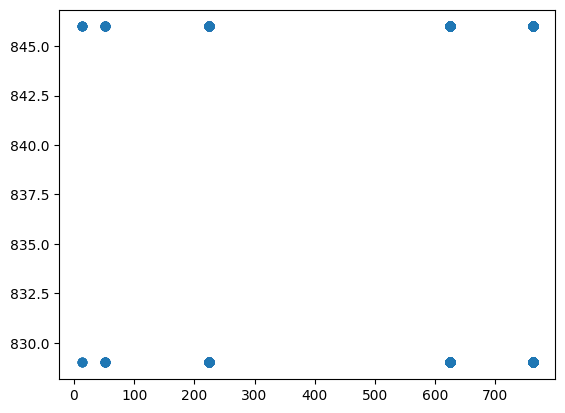

In [34]:
plt.scatter(users_df['country_count'],users_df['gender_count'])

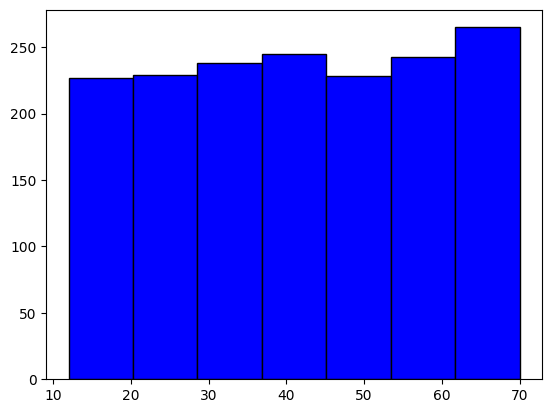

In [36]:
plt.hist(users_df['age'], color='blue',
         edgecolor='black',
         bins=7)
plt.show()

In [38]:
unique_country_list = users_df['country'].unique().tolist()
unique_country_list.sort()
print(unique_country_list)

['Brasil', 'Colombia', 'Japan', 'Spain', 'United States']


country
Brasil           762
Spain            625
United States    224
Japan             51
Colombia          13
Name: count, dtype: int64
[0 1 2 3 4]


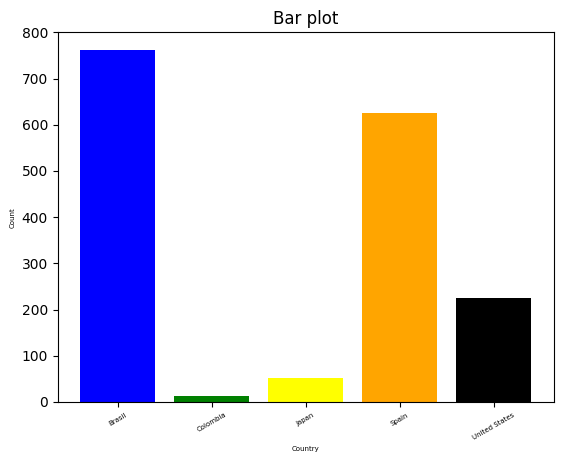

In [44]:
country = ['Brasil', 'Colombia', 'Japan', 'Spain', 'United States']
counts = users_df['country'].value_counts()
print(counts)
index = np.arange(len(country))
print(index)
plt.bar(index, counts[country],color=['blue','green','yellow','orange','black'])
plt.xlabel('Country', fontsize=5)
plt.ylabel('Count', fontsize=5)
plt.xticks(index, country, fontsize=5, rotation=30)
plt.title('Bar plot')
plt.show()